# Import relevant libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import dataframe with pd.read_csv()

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Add overweight column

In [6]:
df.loc[df['weight']/(df['height']/100)**2 > 25, 'overweight'] = int(1)
df.loc[df['weight']/(df['height']/100)**2 <= 25,'overweight'] = 0
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


# Normalize data. If cholesterol or gluc is 1 make the value 0. If > 1 make the value 1.

In [8]:
df.loc[df['cholesterol']==1, 'cholesterol'] = 0
df.loc[df['cholesterol']>1, 'cholesterol'] = 1

df.loc[df['gluc']==1, 'gluc'] = 0
df.loc[df['gluc']>1, 'gluc'] = 1

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


# Create a Dataframe with pd.melt() using the values from ['cholesterol, , 'gluc, 'smoke', 'alco', 'active', 'overweight']. The focus of investigation is "cardio".

In [12]:
columns = ['active', 'alco', 'cholesterol', 'gluc', 'overweight','smoke']
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=columns)
df_cat.head()

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0


# Group and reformat the data to split it by "cardio". Show the count() of each feature.

In [13]:
df_cat = df_cat.reset_index() \
                .groupby(['variable', 'cardio', 'value'])\
                .count()\
                .rename(columns={'index': 'total'})\
                .reset_index()

df_cat

,variable,cardio,value,total
0,active,0,0.0,6378
1,active,0,1.0,28643
2,active,1,0.0,7361
3,active,1,1.0,27618
4,alco,0,0.0,33080
5,alco,0,1.0,1941
6,alco,1,0.0,33156
7,alco,1,1.0,1823
8,cholesterol,0,0.0,35021
9,cholesterol,1,0.0,34979


,variable,cardio,value,level_0,total
0,active,0,0.0,6378,6378
1,active,0,1.0,28643,28643
2,active,1,0.0,7361,7361
3,active,1,1.0,27618,27618
4,alco,0,0.0,33080,33080
5,alco,0,1.0,1941,1941
6,alco,1,0.0,33156,33156
7,alco,1,1.0,1823,1823
8,cholesterol,0,0.0,29330,29330
9,cholesterol,0,1.0,5691,5691


# Draw a catplot with seaborn

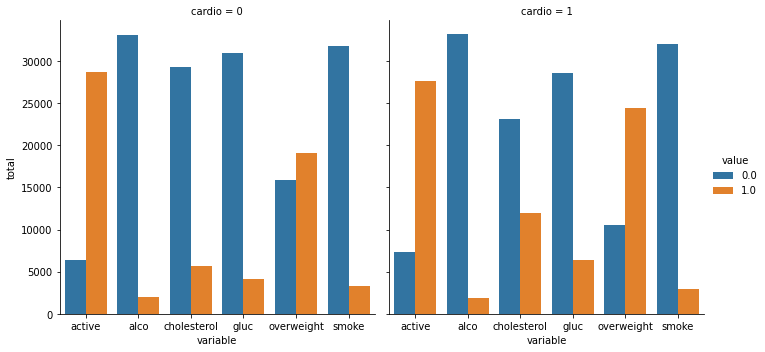

In [144]:
fig = sns.catplot( x = 'variable', y='total', col='cardio', hue='value', data = df_cat, kind='bar')
fig

# Clean the data for a heatmap 

In [17]:
df_heat = df[(df['ap_lo']<=df['ap_hi'])
            & (df['height'] >= df['height'].quantile(0.025))
            & (df['height'] <= df['height'].quantile(0.975))
            & (df['weight'] >= df['weight'].quantile(0.025))
            & (df['weight'] <= df['weight'].quantile(0.975))]

df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


# Draw a heatmap.

In [18]:
#calculate the correlation matrix
corr = df_heat.corr()

In [19]:
#create a mask
mask = np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
#mask the upper triangle
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

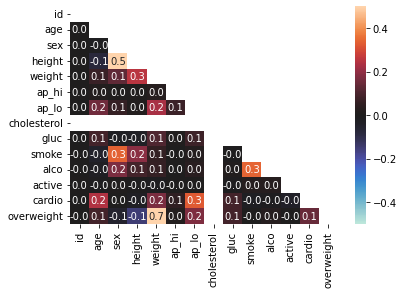

In [21]:
#set-up the heatmap with seaborn
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f',center=0, vmin=-0.5,vmax=0.5)